In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pandas.io.json import json_normalize

In [2]:
df = pd.read_csv('ted_main.csv')
df.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views'],
      dtype='object')

In [3]:
df = df[['name', 'title', 'description', 'main_speaker', 'speaker_occupation', 'num_speaker', 'duration', 'event', 'film_date', 'published_date', 'comments', 'tags', 'languages', 'ratings', 'related_talks', 'url', 'views']]

In [4]:
df.columns

Index(['name', 'title', 'description', 'main_speaker', 'speaker_occupation',
       'num_speaker', 'duration', 'event', 'film_date', 'published_date',
       'comments', 'tags', 'languages', 'ratings', 'related_talks', 'url',
       'views'],
      dtype='object')

In [5]:
#convert the Unix timestamps into a human readable format.
import datetime
df['film_date'] = df['film_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))
df['published_date'] = df['published_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))

In [6]:
df.head()

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,comments,tags,languages,ratings,related_talks,url,views
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,24-02-2006,26-06-2006,4553,"['children', 'creativity', 'culture', 'dance',...",60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,Al Gore: Averting the climate crisis,Averting the climate crisis,With the same humor and humanity he exuded in ...,Al Gore,Climate advocate,1,977,TED2006,24-02-2006,26-06-2006,265,"['alternative energy', 'cars', 'climate change...",43,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,David Pogue: Simplicity sells,Simplicity sells,New York Times columnist David Pogue takes aim...,David Pogue,Technology columnist,1,1286,TED2006,23-02-2006,26-06-2006,124,"['computers', 'entertainment', 'interface desi...",26,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,Majora Carter: Greening the ghetto,Greening the ghetto,"In an emotionally charged talk, MacArthur-winn...",Majora Carter,Activist for environmental justice,1,1116,TED2006,25-02-2006,26-06-2006,200,"['MacArthur grant', 'activism', 'business', 'c...",35,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,Hans Rosling: The best stats you've ever seen,The best stats you've ever seen,You've never seen data presented like this. Wi...,Hans Rosling,Global health expert; data visionary,1,1190,TED2006,21-02-2006,27-06-2006,593,"['Africa', 'Asia', 'Google', 'demo', 'economic...",48,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [7]:
tdf = pd.read_csv('transcripts.csv')
tdf.columns

Index(['transcript', 'url'], dtype='object')

In [8]:
tdf.head()

,transcript,url
0,Good morning. How are you?(Laughter)It's been ...,https://www.ted.com/talks/ken_robinson_says_sc...
1,"Thank you so much, Chris. And it's truly a gre...",https://www.ted.com/talks/al_gore_on_averting_...
2,"(Music: ""The Sound of Silence,"" Simon & Garfun...",https://www.ted.com/talks/david_pogue_says_sim...
3,If you're here today — and I'm very happy that...,https://www.ted.com/talks/majora_carter_s_tale...
4,"About 10 years ago, I took on the task to teac...",https://www.ted.com/talks/hans_rosling_shows_t...


In [9]:
tdf.shape

(2467, 2)

In [10]:
tdf['transcript']

0       Good morning. How are you?(Laughter)It's been ...
1       Thank you so much, Chris. And it's truly a gre...
2       (Music: "The Sound of Silence," Simon & Garfun...
3       If you're here today — and I'm very happy that...
4       About 10 years ago, I took on the task to teac...
5       Thank you. I have to tell you I'm both challen...
6       On September 10, the morning of my seventh bir...
7       I'm going to present three projects in rapid f...
8       It's wonderful to be back. I love this wonderf...
9       I'm often asked, "What surprised you about the...
10      I'm going to take you on a journey very quickl...
11      I can't help but this wish: to think about whe...
12      I'm the luckiest guy in the world. I got to se...
13      I'm really excited to be here today. I'll show...
14      I've been at MIT for 44 years. I went to TED I...
15      (Music)(Music ends)(Applause)(Applause ends)Hi...
16      (Music)(Music ends)(Applause)Thank you!(Applau...
17      In ter

In [11]:
df.shape

(2550, 17)

In [18]:
first = pd.read_csv('ted_main.csv')
second = pd.read_csv('transcripts.csv')

merged = pd.merge(first, second, how='left', on='url')
merged.to_csv('ted_merged.csv', index=False)

In [19]:
mdf = pd.read_csv('ted_merged.csv')

In [20]:
mdf.shape

(2553, 18)

In [21]:
mdf.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,transcript
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,Good morning. How are you?(Laughter)It's been ...
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,"Thank you so much, Chris. And it's truly a gre..."
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,If you're here today — and I'm very happy that...
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,"About 10 years ago, I took on the task to teac..."


In [16]:
df['url'].head()

0    https://www.ted.com/talks/ken_robinson_says_sc...
1    https://www.ted.com/talks/al_gore_on_averting_...
2    https://www.ted.com/talks/david_pogue_says_sim...
3    https://www.ted.com/talks/majora_carter_s_tale...
4    https://www.ted.com/talks/hans_rosling_shows_t...
Name: url, dtype: object

In [17]:
tdf['url'].head()

0    https://www.ted.com/talks/ken_robinson_says_sc...
1    https://www.ted.com/talks/al_gore_on_averting_...
2    https://www.ted.com/talks/david_pogue_says_sim...
3    https://www.ted.com/talks/majora_carter_s_tale...
4    https://www.ted.com/talks/hans_rosling_shows_t...
Name: url, dtype: object

In [23]:
mdf.shape
mdf.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views', 'transcript'],
      dtype='object')

In [24]:
mdf = mdf[['name', 'title', 'description', 'main_speaker', 'speaker_occupation', 'num_speaker', 'duration', 'event', 'film_date', 'published_date', 'comments', 'tags', 'languages', 'ratings', 'related_talks','transcript', 'url', 'views']]

In [28]:
import datetime
mdf['film_date'] = mdf['film_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))
mdf['published_date'] = mdf['published_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))

In [29]:
#Most Viewed Talks of All Time
pop_talks = mdf[['title', 'main_speaker', 'views', 'film_date']].sort_values('views', ascending=False)[:10]
pop_talks

,title,main_speaker,views,film_date
0,Do schools kill creativity?,Ken Robinson,47227110,24-02-2006
1349,Your body language may shape who you are,Amy Cuddy,43155405,25-06-2012
677,How great leaders inspire action,Simon Sinek,34309432,16-09-2009
837,The power of vulnerability,Brené Brown,31168150,05-06-2010
452,10 things you didn't know about orgasm,Mary Roach,22270883,05-02-2009
1779,How to speak so that people want to listen,Julian Treasure,21594632,09-06-2013
201,My stroke of insight,Jill Bolte Taylor,21190883,26-02-2008
5,Why we do what we do,Tony Robbins,20685401,01-02-2006
2117,This is what happens when you reply to spam email,James Veitch,20475972,07-12-2015
1419,"Looks aren't everything. Believe me, I'm a model.",Cameron Russell,19787465,26-10-2012


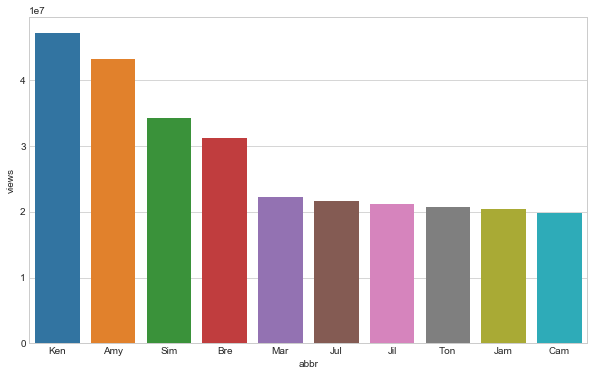

In [30]:
pop_talks['abbr'] = pop_talks['main_speaker'].apply(lambda x: x[:3])
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
sns.barplot(x='abbr', y='views', data=pop_talks)

In [31]:
#Let us now check the number of views and comments on the 10 most commented TED Talks of all time.
mdf[['title', 'main_speaker','views', 'comments']].sort_values('comments', ascending=False).head(10)

,title,main_speaker,views,comments
96,Militant atheism,Richard Dawkins,4374792,6404
0,Do schools kill creativity?,Ken Robinson,47227110,4553
644,Science can answer moral questions,Sam Harris,3433437,3356
201,My stroke of insight,Jill Bolte Taylor,21190883,2877
1790,How do you explain consciousness?,David Chalmers,2162764,2673
954,Taking imagination seriously,Janet Echelman,1832930,2492
840,On reading the Koran,Lesley Hazleton,1847256,2374
1349,Your body language may shape who you are,Amy Cuddy,43155405,2290
661,The danger of science denial,Michael Specter,1838628,2272
677,How great leaders inspire action,Simon Sinek,34309432,1930


In [33]:
#Analysing TED Talks by the month and the year
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
mdf['month'] = mdf['film_date'].apply(lambda x: month_order[int(x.split('-')[1]) - 1])

month_df = pd.DataFrame(mdf['month'].value_counts()).reset_index()
month_df.columns = ['month', 'talks']

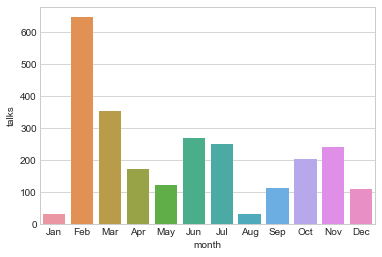

In [34]:
sns.barplot(x='month', y='talks', data=month_df, order=month_order)

In [35]:
#TedX
mdf_x = mdf[mdf['event'].str.contains('TEDx')]
x_month_df = pd.DataFrame(mdf_x['month'].value_counts().reset_index())
x_month_df.columns = ['month', 'talks']

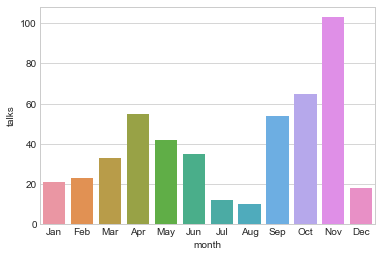

In [36]:
sns.barplot(x='month', y='talks', data=x_month_df, order=month_order)

In [37]:
#popular day
def getday(x):
    day, month, year = (int(i) for i in x.split('-'))    
    answer = datetime.date(year, month, day).weekday()
    return day_order[answer]

In [38]:
mdf['day'] = mdf['film_date'].apply(getday)

In [39]:
day_df = pd.DataFrame(mdf['day'].value_counts()).reset_index()
day_df.columns = ['day', 'talks']

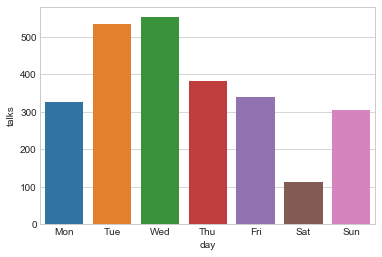

In [40]:
sns.barplot(x='day', y='talks', data=day_df, order=day_order)

In [41]:
#TED Speakers
speaker_df = mdf.groupby('main_speaker').count().reset_index()[['main_speaker', 'comments']]
speaker_df.columns = ['main_speaker', 'appearances']
speaker_df = speaker_df.sort_values('appearances', ascending=False)
speaker_df.head(10)

,main_speaker,appearances
770,Hans Rosling,9
1066,Juan Enriquez,7
1278,Marco Tempest,6
1693,Rives,6
1034,Jonathan Haidt,5
1487,Nicholas Negroponte,5
1075,Julian Treasure,5
424,Dan Ariely,5
850,Jacqueline Novogratz,5
248,Bill Gates,5


In [42]:
#occupation
occupation_df = mdf.groupby('speaker_occupation').count().reset_index()[['speaker_occupation', 'comments']]
occupation_df.columns = ['occupation', 'appearances']
occupation_df = occupation_df.sort_values('appearances', ascending=False)

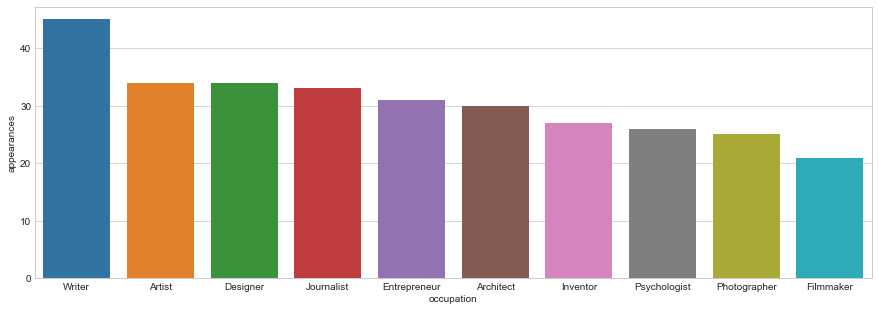

In [43]:
plt.figure(figsize=(15,5))
sns.barplot(x='occupation', y='appearances', data=occupation_df.head(10))

In [44]:
#Finally, let us check the number of talks which have had more than one speaker.
mdf['num_speaker'].value_counts()

1    2495
2      49
3       5
4       3
5       1
Name: num_speaker, dtype: int64

In [45]:
mdf[mdf['num_speaker'] == 5][['title', 'description', 'main_speaker', 'event']]

,title,description,main_speaker,event
2510,A dance to honor Mother Earth,Movement artists Jon Boogz and Lil Buck debut ...,Jon Boogz and Lil Buck,TED2017


In [49]:
#TED Themes
import ast
mdf['tags'] = mdf['tags'].apply(lambda x: ast.literal_eval(x))

In [50]:
s = mdf.apply(lambda x: pd.Series(x['tags']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'theme'

In [51]:
theme_df = mdf.drop('tags', axis=1).join(s)
theme_df.head()

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,comments,languages,ratings,related_talks,transcript,url,views,month,day,theme
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,24-02-2006,26-06-2006,4553,60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Good morning. How are you?(Laughter)It's been ...,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,Feb,Fri,children
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,24-02-2006,26-06-2006,4553,60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Good morning. How are you?(Laughter)It's been ...,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,Feb,Fri,creativity
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,24-02-2006,26-06-2006,4553,60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Good morning. How are you?(Laughter)It's been ...,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,Feb,Fri,culture
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,24-02-2006,26-06-2006,4553,60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Good morning. How are you?(Laughter)It's been ...,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,Feb,Fri,dance
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,24-02-2006,26-06-2006,4553,60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Good morning. How are you?(Laughter)It's been ...,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,Feb,Fri,education


In [52]:
len(theme_df['theme'].value_counts())

416

In [53]:
pop_themes = pd.DataFrame(theme_df['theme'].value_counts()).reset_index()
pop_themes.columns = ['theme', 'talks']
pop_themes.head(10)

,theme,talks
0,technology,727
1,science,567
2,global issues,501
3,culture,488
4,TEDx,450
5,design,418
6,business,349
7,entertainment,300
8,health,236
9,innovation,229


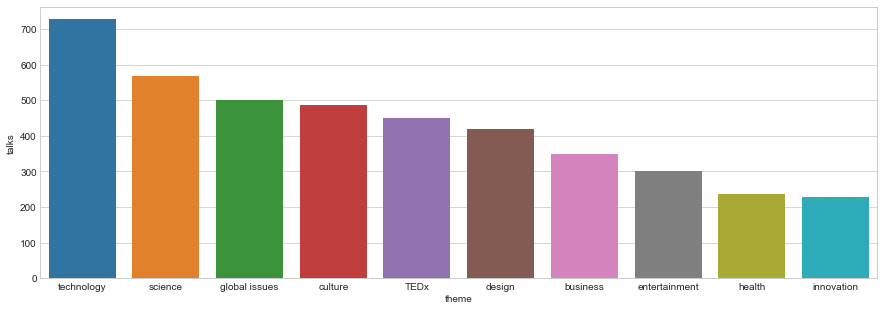

In [54]:
plt.figure(figsize=(15,5))
sns.barplot(x='theme', y='talks', data=pop_themes.head(10))

In [55]:
#Talk Duration and Word Counts
#Convert to minutes
mdf['duration'] = mdf['duration']/60
mdf['duration'].describe()

count    2553.000000
mean       13.776250
std         6.234254
min         2.250000
25%         9.616667
50%        14.133333
75%        17.450000
max        87.600000
Name: duration, dtype: float64

In [56]:
mdf[mdf['duration'] == 2.25]

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,comments,tags,languages,ratings,related_talks,transcript,url,views,month,day
239,Murray Gell-Mann: The ancestor of language,The ancestor of language,After speaking at TED2007 on elegance in physi...,Murray Gell-Mann,Physicist,1,2.25,TED2007,02-03-2007,10-06-2008,76,"[culture, global issues, history, language, ph...",61,"[{'id': 22, 'name': 'Fascinating', 'count': 78...","[{'id': 161, 'hero': 'https://pe.tedcdn.com/im...","Well, I'm involved in other things, besides ph...",https://www.ted.com/talks/murray_gell_mann_on_...,785293,Mar,Fri


In [57]:
mdf['transcript'] = mdf['transcript'].fillna('')
mdf['wc'] = mdf['transcript'].apply(lambda x: len(x.split()))

In [58]:
mdf['wc'].describe()

count    2553.000000
mean     1971.550725
std      1009.494329
min         0.000000
25%      1235.000000
50%      1983.000000
75%      2681.000000
max      9044.000000
Name: wc, dtype: float64

In [59]:
#number of words per minute
mdf['wpm'] = mdf['wc']/mdf['duration']
mdf['wpm'].describe()

count    2553.000000
mean      142.147752
std        39.635348
min         0.000000
25%       131.069182
50%       149.018182
75%       164.984615
max       247.364865
Name: wpm, dtype: float64

In [60]:
mdf[mdf['wpm'] > 245]

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,...,languages,ratings,related_talks,transcript,url,views,month,day,wc,wpm
441,Mae Jemison: Teach arts and sciences together,Teach arts and sciences together,"Mae Jemison is an astronaut, a doctor, an art ...",Mae Jemison,"Astronaut, engineer, entrepreneur, physician a...",1,14.8,TED2002,01-02-2002,04-05-2009,...,20,"[{'id': 24, 'name': 'Persuasive', 'count': 126...","[{'id': 66, 'hero': 'https://pe.tedcdn.com/ima...",What I want to do today is to spend some time ...,https://www.ted.com/talks/mae_jemison_on_teach...,744257,Feb,Fri,3661,247.364865


In [62]:
#TED Ratings
mdf.iloc[1]['ratings']

"[{'id': 7, 'name': 'Funny', 'count': 544}, {'id': 3, 'name': 'Courageous', 'count': 139}, {'id': 2, 'name': 'Confusing', 'count': 62}, {'id': 1, 'name': 'Beautiful', 'count': 58}, {'id': 21, 'name': 'Unconvincing', 'count': 258}, {'id': 11, 'name': 'Longwinded', 'count': 113}, {'id': 8, 'name': 'Informative', 'count': 443}, {'id': 10, 'name': 'Inspiring', 'count': 413}, {'id': 22, 'name': 'Fascinating', 'count': 132}, {'id': 9, 'name': 'Ingenious', 'count': 56}, {'id': 24, 'name': 'Persuasive', 'count': 268}, {'id': 23, 'name': 'Jaw-dropping', 'count': 116}, {'id': 26, 'name': 'Obnoxious', 'count': 131}, {'id': 25, 'name': 'OK', 'count': 203}]"

In [63]:
mdf['ratings'] = mdf['ratings'].apply(lambda x: ast.literal_eval(x))

In [71]:
mdf['funny'] = mdf['ratings'].apply(lambda x: x[0]['count'])
mdf['jawdrop'] = mdf['ratings'].apply(lambda x: x[-3]['count'])
mdf['beautiful'] = mdf['ratings'].apply(lambda x: x[3]['count'])
mdf['confusing'] = mdf['ratings'].apply(lambda x: x[2]['count'])
mdf['courageous'] = mdf['ratings'].apply(lambda x: x[2]['count'])
mdf.head()

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,...,views,month,day,wc,wpm,funny,jawdrop,beautiful,confusing,courageous
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,19.400000,TED2006,24-02-2006,26-06-2006,...,47227110,Feb,Fri,3066,158.041237,19645,1174,3253,6073,6073
1,Al Gore: Averting the climate crisis,Averting the climate crisis,With the same humor and humanity he exuded in ...,Al Gore,Climate advocate,1,16.283333,TED2006,24-02-2006,26-06-2006,...,3200520,Feb,Fri,2089,128.290686,544,116,58,62,62
2,David Pogue: Simplicity sells,Simplicity sells,New York Times columnist David Pogue takes aim...,David Pogue,Technology columnist,1,21.433333,TED2006,23-02-2006,26-06-2006,...,1636292,Feb,Thu,3253,151.772939,964,230,60,183,183
3,Majora Carter: Greening the ghetto,Greening the ghetto,"In an emotionally charged talk, MacArthur-winn...",Majora Carter,Activist for environmental justice,1,18.600000,TED2006,25-02-2006,26-06-2006,...,1697550,Feb,Sat,3015,162.096774,760,230,59,32,32
4,Hans Rosling: The best stats you've ever seen,The best stats you've ever seen,You've never seen data presented like this. Wi...,Hans Rosling,Global health expert; data visionary,1,19.833333,TED2006,21-02-2006,27-06-2006,...,12005869,Feb,Tue,3121,157.361345,3202,2542,318,942,942


In [65]:
#Funniest Talks of all time
mdf[['title', 'main_speaker', 'views', 'published_date', 'funny']].sort_values('funny', ascending=False)[:5]

,title,main_speaker,views,published_date,funny
837,The power of vulnerability,Brené Brown,31168150,23-12-2010,21444
0,Do schools kill creativity?,Ken Robinson,47227110,26-06-2006,19645
1030,How to live before you die,Steve Jobs,8744428,05-10-2011,17290
201,My stroke of insight,Jill Bolte Taylor,21190883,11-03-2008,14447
1129,The happy secret to better work,Shawn Achor,16209727,01-02-2012,11213


In [66]:
#Most Beautiful Talks of all time
mdf[['title', 'main_speaker', 'views', 'published_date', 'beautiful']].sort_values('beautiful', ascending=False)[:5]

,title,main_speaker,views,published_date,beautiful
201,My stroke of insight,Jill Bolte Taylor,21190883,11-03-2008,9437
677,How great leaders inspire action,Simon Sinek,34309432,04-05-2010,8845
381,Your elusive creative genius,Elizabeth Gilbert,13155478,08-02-2009,8130
2164,Inside the mind of a master procrastinator,Tim Urban,14745406,15-03-2016,7445
1129,The happy secret to better work,Shawn Achor,16209727,01-02-2012,7315


In [67]:
#Most Jaw Dropping Talks of all time
mdf[['title', 'main_speaker', 'views', 'published_date', 'jawdrop']].sort_values('jawdrop', ascending=False)[:5]

,title,main_speaker,views,published_date,jawdrop
4,The best stats you've ever seen,Hans Rosling,12005869,27-06-2006,2542
1163,The power of introverts,Susan Cain,17629275,02-03-2012,2467
381,Your elusive creative genius,Elizabeth Gilbert,13155478,08-02-2009,2093
1030,How to live before you die,Steve Jobs,8744428,05-10-2011,1368
0,Do schools kill creativity?,Ken Robinson,47227110,26-06-2006,1174


In [68]:
#Most Confusing Talks of all time
mdf[['title', 'main_speaker', 'views', 'published_date', 'confusing']].sort_values('confusing', ascending=False)[:5]

,title,main_speaker,views,published_date,confusing
1349,Your body language may shape who you are,Amy Cuddy,43155405,01-10-2012,11111
201,My stroke of insight,Jill Bolte Taylor,21190883,11-03-2008,10464
1163,The power of introverts,Susan Cain,17629275,02-03-2012,10218
246,The transformative power of classical music,Benjamin Zander,9315483,24-06-2008,8108
837,The power of vulnerability,Brené Brown,31168150,23-12-2010,7942


In [72]:
#Most Courageous Talks of all time
mdf[['title', 'main_speaker', 'views', 'published_date', 'courageous']].sort_values('courageous', ascending=False)[:5]

,title,main_speaker,views,published_date,courageous
1349,Your body language may shape who you are,Amy Cuddy,43155405,01-10-2012,11111
201,My stroke of insight,Jill Bolte Taylor,21190883,11-03-2008,10464
1163,The power of introverts,Susan Cain,17629275,02-03-2012,10218
246,The transformative power of classical music,Benjamin Zander,9315483,24-06-2008,8108
837,The power of vulnerability,Brené Brown,31168150,23-12-2010,7942
